In [0]:
import torch 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms 
from tqdm.notebook import  tqdm
from IPython.display import clear_output


In [0]:
transforms = transforms.Compose([
    torchvision.transforms.ToTensor()
])
train = torchvision.datasets.MNIST('./data', train=True, download=True, transform=transforms )

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(28*28, 2*28*28),
            nn.ReLU(),
            nn.Linear(2*28*28, 28*28),
            nn.Sigmoid()
        ) 

    def forward(self, x):
        
        return self.model(x)

G = Net()
G_optim = optim.Adam(G.parameters(), lr = 1e-3)


In [0]:
class Net_dis(nn.Module):
    def __init__(self):
        super(Net_dis, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(28*28, 2*28*28),
            nn.ReLU(),
            nn.Linear(2*28*28, 1),
            nn.Sigmoid()
        ) 

    def forward(self, x):
        

        return self.model(x)

D = Net_dis()
D_optim = optim.Adam(D.parameters(), lr = 0.0005)

In [0]:
noise = torch.randn([1,1, 1, 28*28])
answer = G(noise).squeeze(0).squeeze(0).view([28,28]).detach().numpy()

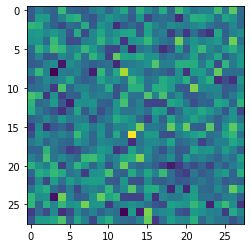

In [195]:
plt.imshow(answer)

In [196]:
for epoch in range(2):
    g_loss_run = []
    d_loss_run = []

    for data in tqdm(train_loader):

        x, _ = data 

        


        nb_size = x.size(0)

        x = x.view(x.size(0), -1)

        one_labels = torch.ones(nb_size, 1)
        zero_labels = torch.zeros(nb_size, 1)

        z = torch.randn(nb_size, 28*28)

       

        G_sample = G(z)

        D_fake = D(G_sample)

        D_real = D(x)

        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)

        D_loss = D_fake_loss + D_real_loss

        D_optim.zero_grad()
        D_loss.backward()
        D_optim.step()

        z = torch.randn(nb_size, 28*28 )

        G_sample = G(z)
        D_fake = D(G_sample)

        G_loss =  F.binary_cross_entropy(D_fake, one_labels)

        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()

        g_loss_run.append(G_loss)

        plt.plot(g_loss_run)
        plt.show()
        clear_output(wait = True)


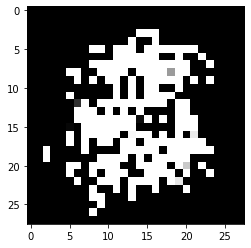

In [198]:
samples = G(z[0]).detach()

samples = samples.view([28,28])

sample = samples.numpy()

plt.imshow(sample, cmap = "gray")

